# Training Pipeline

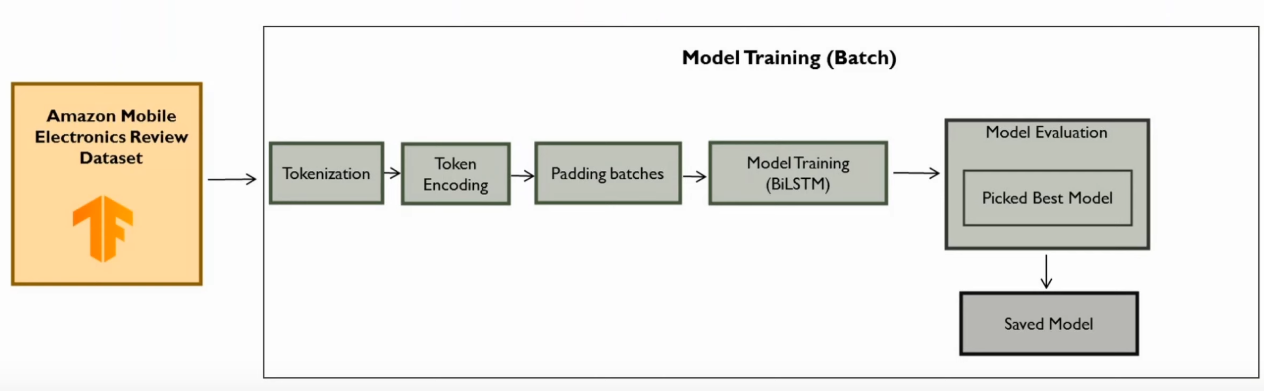

# Deployment Pipeline

- We need to preload the vocabulary and the model.
- Loading can take significant time.

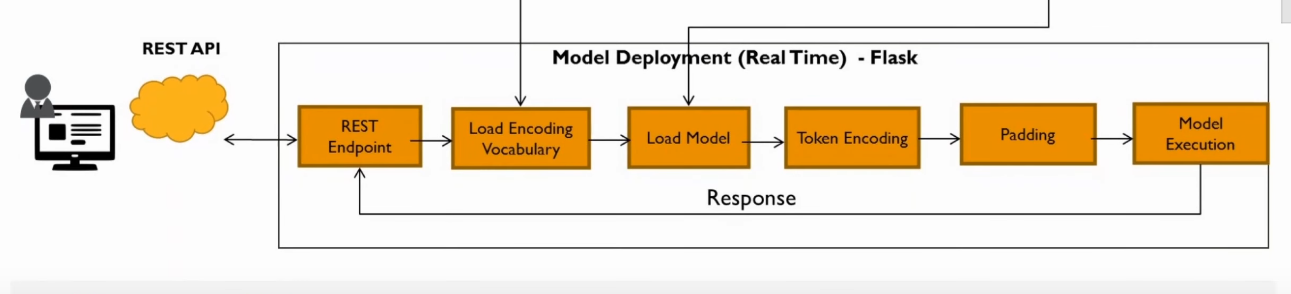

# Deployment Code

## Load model and check stuff

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.2.0-rc1


In [5]:
MODEL_PATH = '/content/drive/My Drive/models/sentiment_analysis.hdf5'
model = tf.keras.models.load_model(MODEL_PATH)
print(model.outputs)

[<tf.Tensor 'dense_11/Identity:0' shape=(None, 1) dtype=float32>]


In [7]:
print(model.inputs)

[<tf.Tensor 'embedding_2_input:0' shape=(None, None) dtype=float32>]


In [0]:
model.summary()

In [0]:
model.get_weights()

In [0]:
emb_layer = model.get_layer(index=0)

In [0]:
emb_weights = emb_layer.get_weights()[0]

In [12]:
emb_weights.shape

(73740, 128)

In [0]:
lstm_layer = model.get_layer(index=1)

In [14]:
lstm_layer.output_shape

(None, None, 256)

In [0]:
lstm_layer.weights

## Deploying

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [24]:
model = tf.keras.models.load_model('//content//drive//My Drive//models//sentiment_analysis.hdf5')

In [0]:
text_encoder = tfds.features.text.TokenTextEncoder.load_from_file('/content/sa_encoder.vocab')

In [0]:
def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec

In [0]:
def predict_fn(pred_text, pad_size):
    encoded_pred_text = text_encoder.encode(pred_text)
    encoded_pred_text = pad_to_size(encoded_pred_text, pad_size)
    encoded_pred_text = tf.cast(encoded_pred_text, tf.int64)
    predictions = model.predict(tf.expand_dims(encoded_pred_text, 0)) # To add the batch size

    return predictions


# Checking the pipeline

In [48]:
pred_text = ('Worst prouct. Never buy such cheap stuff. Seller gave very late.')
predictions = predict_fn(pred_text, 1000)
print(predictions)

[[-6.419407]]


In [49]:
pred_text = ('Beautiful product. Masterpiece. I would recommend this to anyone and everyone. Great delivery')
predictions = predict_fn(pred_text, 1000)
print(predictions)

[[5.3432555]]
